### Apply Linear regression model on Audi Car Prices


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import metrics

In [2]:
df=pd.read_csv("audi.csv")

In [3]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [5]:
print(df.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


### Feature Engineering

In [75]:
df_onehot = pd.get_dummies(df,columns=['model', 'transmission','fuelType'])

In [80]:
def plotting_2_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    
    # customizing the QQ_plot. 
    ax1 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax1.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax1)

    ## Customizing the Box Plot. 
    ax2 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax2.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax2 );

Skewness: 2.2773230863659157
Kurtosis: 11.671631906714016


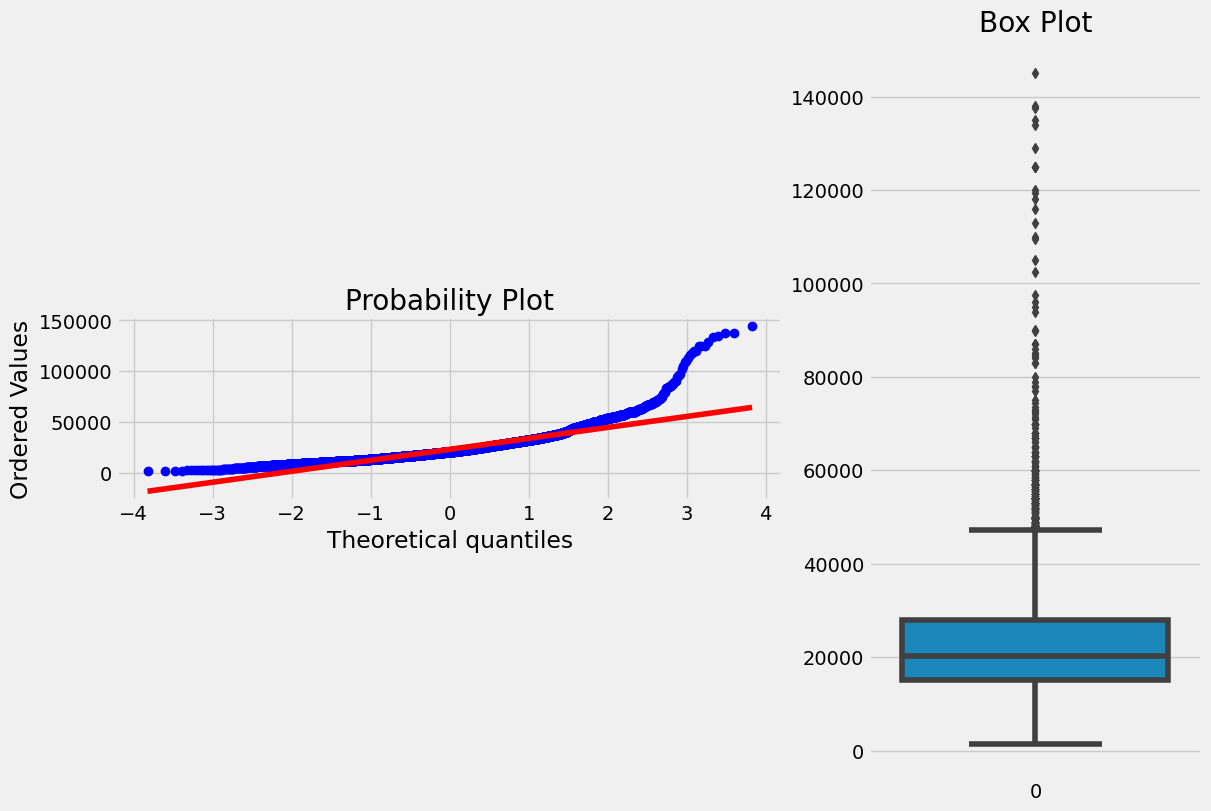

In [81]:
 plotting_2_chart(df_onehot, 'price')
#skewness and kurtosis
print("Skewness: " + str(df_onehot['price'].skew()))
print("Kurtosis: " + str(df_onehot['price'].kurt()))

# Apply Linear regression model

In [13]:
from sklearn import linear_model
import matplotlib.pyplot as plt

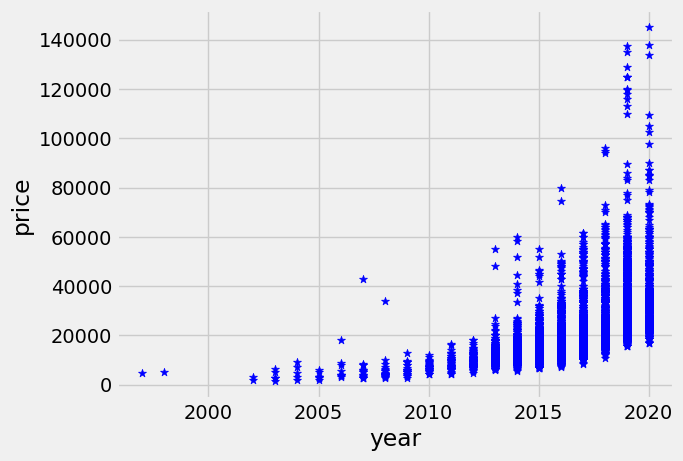

In [91]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('price')
plt.scatter(df.year,df.price,color='blue',marker='*')

In [92]:
blue, orange, green, red = sns.color_palette()[:4]

In [84]:
new_df = df.drop('price',axis='columns')
new_df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,A3,2020,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,Automatic,8646,Petrol,150,47.9,1.4


In [85]:
price = df.price
price

0        12500
1        16500
2        11000
3        16800
4        17300
         ...  
10663    16999
10664    16999
10665    17199
10666    19499
10667    15999
Name: price, Length: 10668, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = df_onehot.drop(['price'],axis=1)
y = df_onehot['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [88]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X,y)

0.8916373387034432

In [89]:
results = X_test.copy()
results["predicted"] = regressor.predict(X_test)
results["actual"]= y_test
results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(2)
results

,predicted,actual
10297,15719.39,14700
4766,29138.28,28990
10248,11833.05,12700
7287,25951.44,22990
8631,19947.08,18950
...,...,...
1946,35477.30,30490
4785,13714.66,18490
9990,20263.81,17490
3061,16561.89,13852


# #Conclusion 

In [ ]:
The model performs well.